Coefficint of Determination:  0.9606822396194844


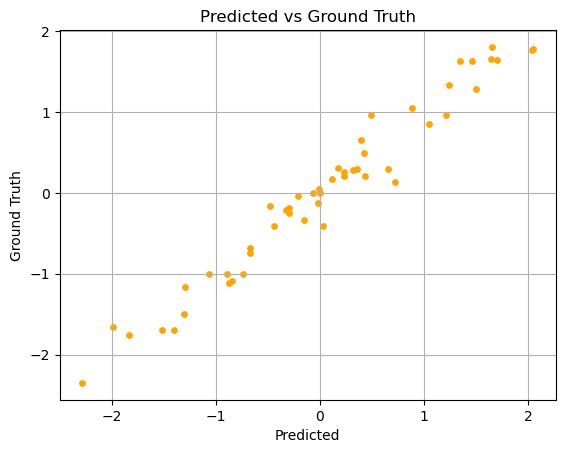

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression



## PROBLEM 1: LINEAR REGRESSION ##
x_train = pd.read_csv('x1.csv', header = None)
x_test = pd.read_csv('x2.csv', header = None)
y_train = pd.read_csv('y1.csv', header = None)
y_test = pd.read_csv('y2.csv', header = None)

x_train_arr = x_train.to_numpy()
x_test_arr = x_test.to_numpy()
y_train_arr = y_train.to_numpy()
y_test_arr = y_test.to_numpy()


## Part A ##
lin_model = LinearRegression()
lin_model = lin_model.fit(x_train_arr, y_train_arr)
lin_pred = lin_model.predict(x_test_arr)
score = lin_model.score(x_test_arr, y_test_arr)
print("Coefficint of Determination: ", score)

# plot
plt.figure()
plt.scatter(lin_pred, y_test_arr, color='orange', s = 15)
plt.grid()
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.title("Predicted vs Ground Truth")
plt.savefig("./images/QAplot")

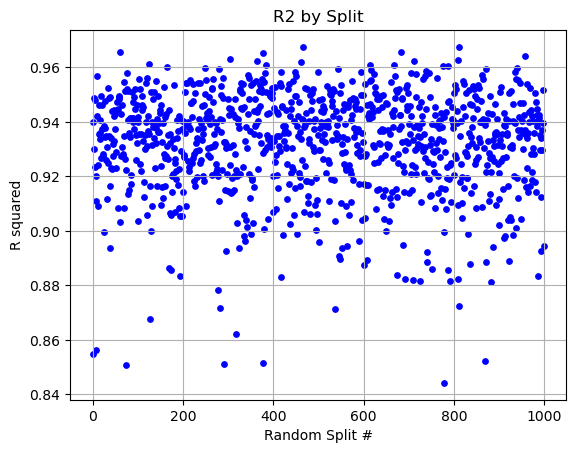

In [3]:
## Part B ##
r2 = []
splits = []
X = pd.concat([x_train, x_test], ignore_index=True, axis = 0)
y = pd.concat([y_train, y_test], ignore_index=True, axis = 0)
random.seed(123)

for i in range(1000):
    # Random 50-50 splits #
    split = random.sample(range(1, 100), 50)
    
    x_tr = X.iloc[split]
    x_te = X.drop(x_tr.index)
    y_tr = y.iloc[split]
    y_te = y.drop(y_tr.index)

    lin_model = lin_model.fit(x_tr, y_tr)
    lin_pred = lin_model.predict(x_te)
    score = lin_model.score(x_te, y_te)
    r2.append(score)

plt.figure()
plt.scatter(range(1000), r2, color='b', s = 15)
plt.grid()
plt.xlabel("Random Split #")
plt.ylabel("R squared")
plt.title("R2 by Split")
plt.savefig("./images/QBplot")